In [30]:
import sys
sys.path.append('..')

In [31]:
from pymavlink import mavutil

import matplotlib.pyplot as plt
import pandas as pd
import os
import geopandas as gpd
from shapely.geometry import Point, LineString

In [32]:
from config import RUTA_UNIDAD_ONE_DRIVE
from config import RUTA_LOCAL_ONE_DRIVE

RUTA_COMPLETA = os.path.join(RUTA_UNIDAD_ONE_DRIVE, RUTA_LOCAL_ONE_DRIVE)

In [33]:
RUTA_COMPLETA

'G:\\OneDrive - Ingenio Azucarero Guabira S.A\\_DATOS_PYTHON'

In [34]:
vehiculo = 'DA02'

In [35]:
path_rec = RUTA_UNIDAD_ONE_DRIVE + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2025\SHP\RECORRIDOS.shp'
gdf_rec = gpd.read_file(path_rec)

In [36]:
if vehiculo == 'DA01':
    path_log = RUTA_UNIDAD_ONE_DRIVE + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2025\TLOGS\ALTA_01'
elif vehiculo == 'DA02':
    path_log = RUTA_UNIDAD_ONE_DRIVE + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2025\TLOGS\ALTA_02'
elif vehiculo == 'DA03':
    path_log = RUTA_UNIDAD_ONE_DRIVE + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2025\TLOGS\ALTA_03'
contenido = os.listdir(path_log)
len(contenido)

46

In [37]:
# Filtrar la lista 'contenido' para excluir elementos que están en la columna 'nombre' del GeoDataFrame
contenido_filtrado = [item for item in contenido if item not in gdf_rec['nombre'].values]
len(contenido_filtrado)

41

In [38]:
def leer_logs(lista_logs):
    list_geo = []
    list_name = []
    for i in lista_logs:
        log = path_log + '/' + i
        
        name = i
        
        mlog = mavutil.mavlink_connection(log)
        lats = []
        lons = []
        while True:
            msg = mlog.recv_match()
            if not msg:
                break
            # Ejemplo de procesamiento de mensaje
            if msg.get_type() == 'GLOBAL_POSITION_INT':
                lat = msg.lat / 1e7  # Latitud en grados
                lon = msg.lon / 1e7  # Longitud en grados
                lats.append(lat)
                lons.append(lon)

        coors = {'lat':lats, 'lon':lons}
        df = pd.DataFrame(coors)
        
        geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
        line = LineString(geometry)
        list_geo.append(line)
        list_name.append(name)
    return (list_geo, list_name)

In [39]:
lineas, names = leer_logs(contenido_filtrado)

In [40]:
lineas

[<LINESTRING (-63.198 -17.243, -63.198 -17.243, -63.198 -17.243, -63.198 -17....>,
 <LINESTRING (-63.129 -17.293, -63.129 -17.293, -63.129 -17.293, -63.129 -17....>,
 <LINESTRING (-63.138 -17.294, -63.138 -17.294, -63.138 -17.294, -63.138 -17....>,
 <LINESTRING (-63.139 -17.251, -63.139 -17.251, -63.139 -17.251, -63.139 -17....>,
 <LINESTRING (-63.148 -17.255, -63.148 -17.255, -63.148 -17.255, -63.148 -17....>,
 <LINESTRING (-63.151 -17.265, -63.151 -17.265, -63.151 -17.265, -63.151 -17....>,
 <LINESTRING (0 0, 0 0, 0 0, 0 0, 0 0, 0 0, 0 0, 0 0, 0 0, 0 0, 0 0, 0 0, 0 0...>,
 <LINESTRING (-63.648 -17.273, -63.648 -17.273, -63.648 -17.273, -63.648 -17....>,
 <LINESTRING (-63.149 -17.227, -63.149 -17.227, -63.149 -17.227, -63.149 -17....>,
 <LINESTRING (-63.165 -17.277, -63.165 -17.277, -63.165 -17.277, -63.165 -17....>,
 <LINESTRING (-63.107 -17.151, -63.107 -17.151, -63.107 -17.151, -63.107 -17....>,
 <LINESTRING (-63.001 -17.224, -63.001 -17.224, -63.001 -17.224, -63.001 -17....>,
 <LI

In [41]:
# Crear un GeoDataFrame con los LineStrings y sus nombres
gdf_lines = gpd.GeoDataFrame({'nombre': names, 'geometry': lineas}, crs="EPSG:4326")

In [42]:
gdf_lines

,nombre,geometry
0,2024-05-18 16-12-01.tlog,"LINESTRING (-63.19842 -17.24297, -63.19842 -17..."
1,2024-09-08 08-09-24.tlog,"LINESTRING (-63.12879 -17.29262, -63.12879 -17..."
2,2024-09-08 08-38-09.tlog,"LINESTRING (-63.13781 -17.29423, -63.13781 -17..."
3,2024-09-10 20-34-08.tlog,"LINESTRING (-63.13882 -17.25077, -63.13882 -17..."
4,2024-09-10 21-32-34.tlog,"LINESTRING (-63.14833 -17.25458, -63.14833 -17..."
5,2024-09-10 22-12-39.tlog,"LINESTRING (-63.15099 -17.26455, -63.15099 -17..."
6,2024-09-11 19-54-29.tlog,"LINESTRING (0.00000 0.00000, 0.00000 0.00000, ..."
7,2024-09-13 18-51-15.tlog,"LINESTRING (-63.64849 -17.27301, -63.64849 -17..."
8,2024-09-13 20-07-20.tlog,"LINESTRING (-63.14937 -17.22700, -63.14937 -17..."
9,2024-09-16 20-48-38.tlog,"LINESTRING (-63.16515 -17.27737, -63.16512 -17..."


<Axes: >

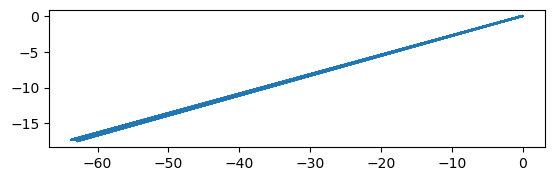

In [43]:
gdf_lines.plot()

In [44]:
gdf_lines.to_file('LINEAS.shp', driver="ESRI Shapefile")

In [45]:
# Función para dividir y limpiar las líneas
def dividir_y_limpiar_linea(linea):
    puntos = list(linea.coords)
    nuevas_lineas = []
    nueva_linea = []
    
    for punto in puntos:
        if punto != (0, 0):
            nueva_linea.append(punto)
        else:
            if nueva_linea:
                nuevas_lineas.append(LineString(nueva_linea))
                nueva_linea = []
    
    if nueva_linea:
        nuevas_lineas.append(LineString(nueva_linea))
    
    return nuevas_lineas

In [46]:
# Crear una lista para las nuevas líneas y nombres
nuevas_lineas = []
nuevos_nombres = []
for idx, row in gdf_lines.iterrows():
    lineas_divididas = dividir_y_limpiar_linea(row.geometry)
    for linea in lineas_divididas:
        nuevas_lineas.append(linea)
        nuevos_nombres.append(row['nombre'])

In [47]:
# Crear un nuevo GeoDataFrame con las nuevas líneas
gdf_lines = gpd.GeoDataFrame({'nombre': nuevos_nombres, 'geometry': nuevas_lineas}, crs="EPSG:4326")

In [48]:
# Función para contar la cantidad de coordenadas en una geometría de tipo LINESTRING
def contar_coordenadas(linea):
    return len(linea.coords)

In [49]:
gdf_lines['num_vert'] = gdf_lines['geometry'].apply(contar_coordenadas)

In [50]:
gdf_lines['vehiculo'] = vehiculo

In [51]:
gdf_lines

,nombre,geometry,num_vert,vehiculo
0,2024-05-18 16-12-01.tlog,"LINESTRING (-63.19842 -17.24297, -63.19842 -17...",7834,DA02
1,2024-09-08 08-09-24.tlog,"LINESTRING (-63.12879 -17.29262, -63.12879 -17...",1272,DA02
2,2024-09-08 08-38-09.tlog,"LINESTRING (-63.13781 -17.29423, -63.13781 -17...",1155,DA02
3,2024-09-10 20-34-08.tlog,"LINESTRING (-63.13882 -17.25077, -63.13882 -17...",3753,DA02
4,2024-09-10 21-32-34.tlog,"LINESTRING (-63.14833 -17.25458, -63.14833 -17...",2867,DA02
...,...,...,...,...
59,2025-07-04 08-49-26.tlog,"LINESTRING (-62.81536 -17.44340, -62.81536 -17...",2333,DA02
60,2025-07-04 11-04-53.tlog,"LINESTRING (-62.81446 -17.45074, -62.81446 -17...",2740,DA02
61,2025-07-04 11-04-53.tlog,"LINESTRING (-62.81444 -17.45073, -62.81444 -17...",2197,DA02
62,2025-07-04 12-50-57.tlog,"LINESTRING (-62.82572 -17.44539, -62.82572 -17...",4851,DA02


<Axes: >

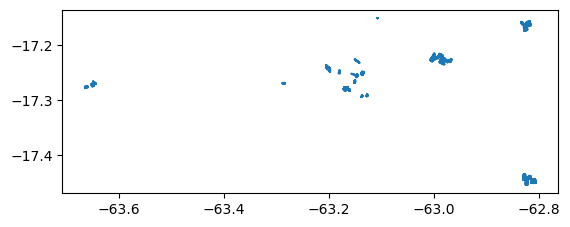

In [52]:
gdf_lines.plot()

In [53]:
gdf_lines.crs = "EPSG:4326"
gdf_lines_utm = gdf_lines.to_crs(epsg=32720)

<Axes: >

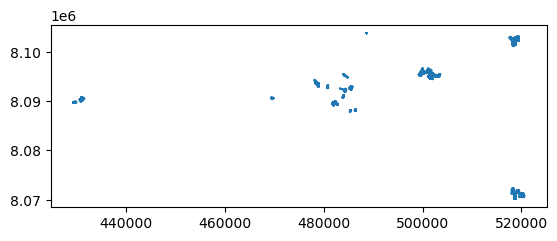

In [54]:
gdf_lines_utm.plot()

In [55]:
# Combinar los GeoDataFrames
gdf_combined = gpd.GeoDataFrame(pd.concat([gdf_rec, gdf_lines_utm], ignore_index=True))
# rellenar valores NaN
gdf_combined['idd'] = gdf_combined['idd'].fillna(0).astype(int)

In [56]:
gdf_combined

,idd,nombre,vehiculo,num_vert,id,asignado,geometry
0,-1,2025-05-02 08-32-28.tlog,DA02,2517,None,ORIGINAL,"LINESTRING (471873.745 8084797.248, 471873.415..."
1,-1,2025-05-05 16-16-47.tlog,DA02,1056,None,ORIGINAL,"LINESTRING (478886.299 8093597.535, 478886.288..."
2,-1,2025-05-05 16-32-05.tlog,DA02,345,None,ORIGINAL,"LINESTRING (478939.004 8093577.919, 478939.004..."
3,-1,2025-05-05 21-05-04.tlog,DA02,3426,None,ORIGINAL,"LINESTRING (478661.660 8093836.724, 478660.405..."
4,-1,2025-05-05 21-05-04.tlog,DA02,3207,None,ORIGINAL,"LINESTRING (478649.523 8093832.840, 478649.555..."
...,...,...,...,...,...,...,...
94,0,2025-07-04 08-49-26.tlog,DA02,2333,NaN,NaN,"LINESTRING (519606.800 8071383.554, 519606.917..."
95,0,2025-07-04 11-04-53.tlog,DA02,2740,NaN,NaN,"LINESTRING (519701.965 8070571.091, 519701.976..."
96,0,2025-07-04 11-04-53.tlog,DA02,2197,NaN,NaN,"LINESTRING (519703.793 8070572.760, 519703.782..."
97,0,2025-07-04 12-50-57.tlog,DA02,4851,NaN,NaN,"LINESTRING (518506.171 8071163.747, 518506.469..."


In [57]:
gdf_combined.dtypes

idd            int32
nombre        object
vehiculo      object
num_vert       int64
id            object
asignado      object
geometry    geometry
dtype: object

In [58]:
gdf_combined.to_file(path_rec, driver="ESRI Shapefile")